# 6_KNearestNeighbours

It is basically used for the classification .

It is based on the Supervised Learning . 

It assumes that th data points having similar features stay close to each other.

K is the number of the nearest Neighbour.

Small k value will increase the effect of noise and the outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data

In [5]:
y = iris.target

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x.shape

(150, 4)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=15)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(metric='euclidean')

In [12]:
test_case = xtest[0].reshape(1,-1)

In [13]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean')

In [14]:
n,m = knn.kneighbors(test_case,n_neighbors=6,return_distance=True)

In [15]:
# n will have the distance of the six nearest neighbors and m holds the index of the 6 close neighbors

In [16]:
m

array([[ 60,  12,  75,  65,  32, 107]], dtype=int64)

In [17]:
m[0]


array([ 60,  12,  75,  65,  32, 107], dtype=int64)

In [18]:
for i in m[0]:
    print(ytrain[i])

0
0
0
0
0
0


In [19]:
pred = knn.predict(test_case)

In [20]:
pred

array([0])

In [21]:
# prediction on all the test samples
predicted = knn.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(ytest,predicted)

1.0

In [24]:
# for showing the misclassified samples
import numpy as np

In [25]:
np.where(ytest!=predicted)

(array([], dtype=int64),)

In [26]:
# let's work on load_digits
from sklearn.datasets import load_digits

In [27]:
digits = load_digits()

In [28]:
x=digits.data
y=digits.target

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=25,test_size=0.2)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [33]:
print(knn.score(xtest,ytest))

0.9861111111111112


In [34]:
error =[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    accuracy_score = knn.score(xtest,ytest)
    test_error = 1 - accuracy_score
    error.append(test_error)

In [35]:
error

[0.011111111111111072,
 0.01388888888888884,
 0.01666666666666672,
 0.01666666666666672,
 0.01388888888888884,
 0.011111111111111072,
 0.011111111111111072,
 0.011111111111111072,
 0.011111111111111072,
 0.01666666666666672,
 0.019444444444444486,
 0.022222222222222254,
 0.01666666666666672,
 0.022222222222222254,
 0.01666666666666672,
 0.019444444444444486,
 0.022222222222222254,
 0.025000000000000022,
 0.025000000000000022,
 0.02777777777777779]

In [36]:
import matplotlib.pyplot as plt

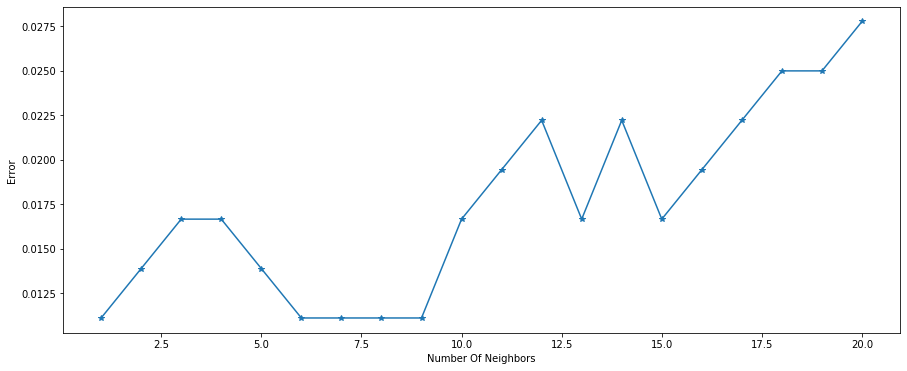

In [37]:
plt.figure(figsize=(15,6))
plt.plot(range(1,21),error,marker="*")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Error")
plt.show()

In [38]:
# when number of neighbors =  9 error is low

In [39]:
# second method is hyper parameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# creating the model
knn = KNeighborsClassifier()

In [42]:
p = {'n_neighbors':[1,3,4,5,7,8,9,10,12]}

In [44]:
gd = GridSearchCV(estimator = knn,param_grid=p,scoring='accuracy')

In [45]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 4, 5, 7, 8, 9, 10, 12]},
             scoring='accuracy')

In [46]:
gd.best_params_

{'n_neighbors': 1}